In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import f1_score
import xgboost as xgb
import lightgbm as lgb
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")
%config InlineBackend.figure_format = 'retina'

In [2]:
path_data = '../tables/train_df_4.csv'
path_model = '../models/lgb_train_df_4.model'

In [3]:
data = pd.read_csv(path_data)
data_test = data.copy()
# data = data.sample(frac=1)

data.drop(['hash_inn'], 1, inplace=True)
data = data[data['target'] != -1]
data_test = data_test[data_test['target'] == -1]
train_cols = [x for x in list(data.columns) if x != 'target']

X = data[train_cols]
y = data['target']

In [37]:
p = 0.9
train_portion = int(X.shape[0] * p)
X_train, y_train = X.iloc[:train_portion], y.iloc[:train_portion]
X_test, y_test = X.iloc[train_portion:], y.iloc[train_portion:]

# dtest = xgb.DMatrix(X_test, label=y_test)
dtest = lgb.Dataset(X_test, label=y_test)

In [5]:
model = lgb.Booster(model_file=path_model)

preds = model.predict(X_test)
preds = preds.argmax(axis=1)

In [64]:
print('macro - {}, micro {}'.format(f1_score(preds, list(y_test), average='macro'), f1_score(preds, list(y_test), average='micro')))

macro - 0.5664766387588986, micro 0.4874133527909522


In [59]:
ind = 40
[int(x) for x in preds[ind:ind + 10]]

[12, 12, 12, 14, 26, 67, 26, 12, 75, 34]

In [60]:
list(y_test)[ind:ind + 10]

[47, 12, 12, 14, 26, 67, 26, 8, 75, 34]

Text(0.5,1,'Light GBM Feature Importance')

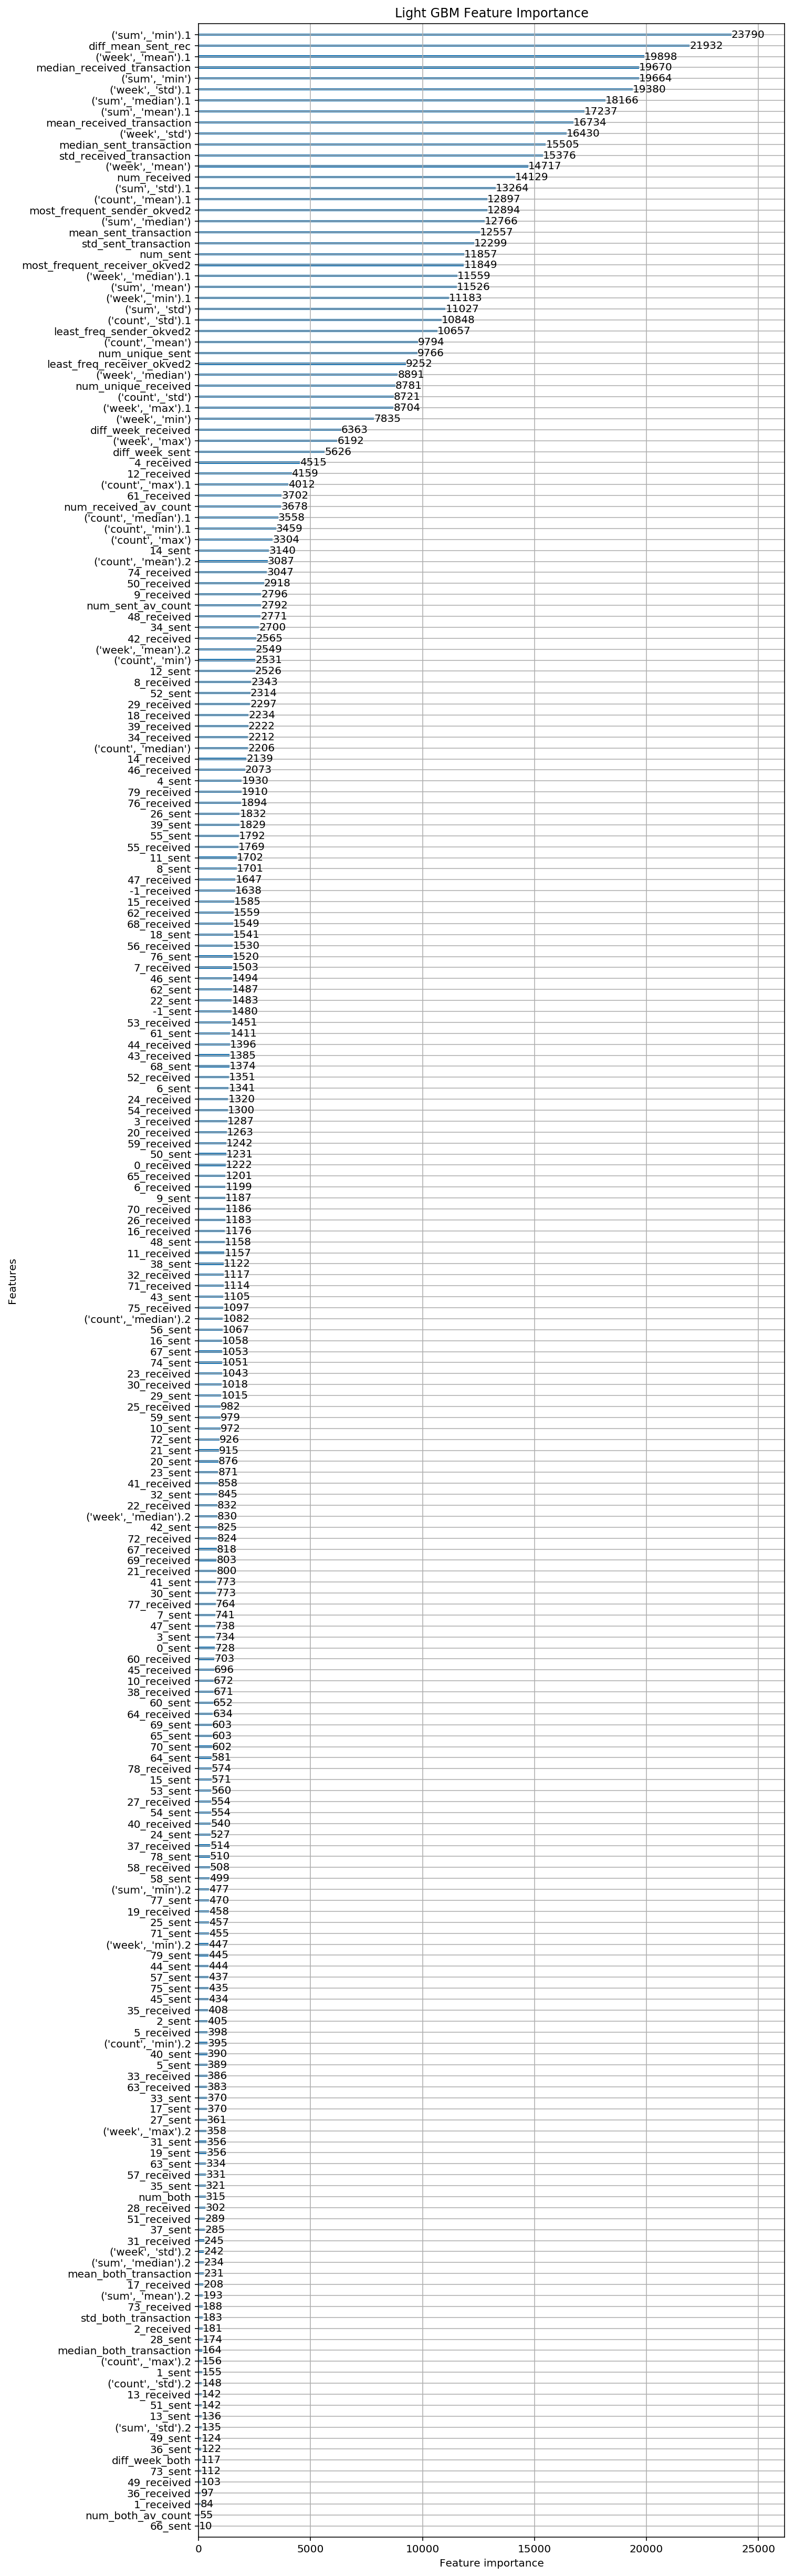

In [66]:
fig, ax = plt.subplots(figsize=(10, 44))
lgb.plot_importance(model, max_num_features=60, ax=ax)
plt.title("Light GBM Feature Importance")

In [4]:
data_test.head(7)

,hash_inn,"('count', 'mean')","('count', 'median')","('count', 'std')","('count', 'min')","('count', 'max')","('week', 'mean')","('week', 'median')","('week', 'std')","('week', 'min')",...,"('sum', 'std').2","('sum', 'min').2",diff_week_both,mean_both_transaction,median_both_transaction,num_both,num_both_av_count,std_both_transaction,diff_mean_sent_rec,target
0,0,2.282353,2.0,1.532286,1.0,9.0,11.000000,11.0,6.271629,1.0,...,12029.246552,0.8,21.0,1091.926,119.8,10.0,2.6,2994.562639,935.306187,-1
2,2,1.666667,2.0,0.577350,1.0,2.0,4.666667,1.0,6.350853,1.0,...,-1.000000,-1.0,-1.0,-1.000,-1.0,-1.0,-1.0,-1.000000,-8.719240,-1
4,4,1.058824,1.0,0.242536,1.0,2.0,13.882353,13.0,5.666595,6.0,...,-1.000000,-1.0,-1.0,-1.000,-1.0,-1.0,-1.0,-1.000000,1.621176,-1
6,6,1.000000,1.0,-1.000000,1.0,1.0,21.000000,21.0,-1.000000,21.0,...,-1.000000,-1.0,-1.0,-1.000,-1.0,-1.0,-1.0,-1.000000,9.800000,-1
9,9,1.000000,1.0,0.000000,1.0,1.0,13.500000,13.5,10.606602,6.0,...,-1.000000,-1.0,-1.0,-1.000,-1.0,-1.0,-1.0,-1.000000,14.222000,-1
12,12,2.500000,2.5,2.121320,1.0,4.0,11.000000,11.0,12.727922,2.0,...,-1.000000,-1.0,-1.0,-1.000,-1.0,-1.0,-1.0,-1.000000,16.940000,-1
14,15,-1.000000,-1.0,-1.000000,-1.0,-1.0,-1.000000,-1.0,-1.000000,-1.0,...,-1.000000,-1.0,-1.0,-1.000,-1.0,-1.0,-1.0,-1.000000,-3.640000,-1


In [7]:
hash_inn = data_test['hash_inn'].iloc[:10]
data_test.drop(['hash_inn'], 1, inplace=True)

preds = model.predict(data_test[train_cols].iloc[:10])
preds = preds.argmax(axis=1)

submit = pd.DataFrame({'hash_inn': hash_inn, 'y': preds})

In [18]:
submit.to_csv('GrigoriiPogorelov-03122018-SberbankIndustry.csv', index=False)